In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def keplerIII_period_to_semimajor_axis(orbital_period):
    #########################################################
    # Units: orbital period [yr], separation [au]           #
    #########################################################
    semimajor_axis_cubed = orbital_period**2
    semimajor_axis = semimajor_axis_cubed**(1./3.)
    
    return semimajor_axis

def make_kepler_orbit(eccentricity,orbital_period):
    ##########################################################
    # Units: orbital period [years]                          #
    # returns: 500 true anomaly values throughout the orbit  #
    ##########################################################
    nStep = 500
    tRange = np.linspace(0.0,orbital_period,nStep)
    
    theta = []    
    for time in tRange:
        PsiDiff = 1.0
        M = 2*np.pi*time/orbital_period
        PsiOld = M
        theta0old = 180.0
        while PsiDiff > 1e-10:
            PsiNew = M + eccentricity*np.sin(PsiOld)
            PsiDiff = PsiNew-PsiOld
            PsiOld = PsiNew
        theta0 = 2*np.arctan(((1+eccentricity)/(1-eccentricity))**(0.5)*np.tan(PsiOld/2.))
        theta.append(theta0)        
    return theta

In [7]:
orbital_period = 1.0
eccentricity = 0.02

In [8]:
list1 = make_kepler_orbit(eccentricity,orbital_period)


In [9]:
def orbit(semimajor_axis,eccentricity,true_anomaly): 
    ##############################################
    # Units: separation [au] #
    ##############################################
    
    # define the shape equation
    r_orbit = semimajor_axis*(1 - eccentricity**2)/(1 + eccentricity*np.cos(true_anomaly))
    x_orbit = r_orbit*np.cos(true_anomaly)
    y_orbit = r_orbit*np.sin(true_anomaly)
     
    
    return x_orbit,y_orbit

In [10]:
semimajor_axis = keplerIII_period_to_semimajor_axis(orbital_period)

In [11]:
xOrbit, yOrbit = orbit(semimajor_axis,eccentricity,list1)


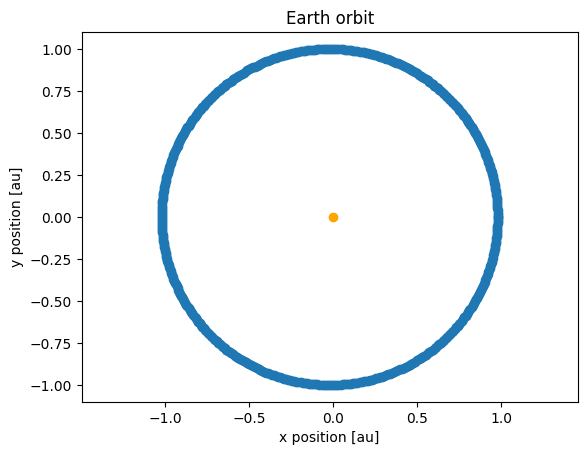

In [12]:
plt.title('Earth orbit')
# The Sun is located at the origin.
plt.scatter(0,0, color='orange')
plt.scatter(xOrbit,yOrbit)
plt.axis('equal')
plt.xlabel('x position [au]')
plt.ylabel('y position [au]')
plt.show()

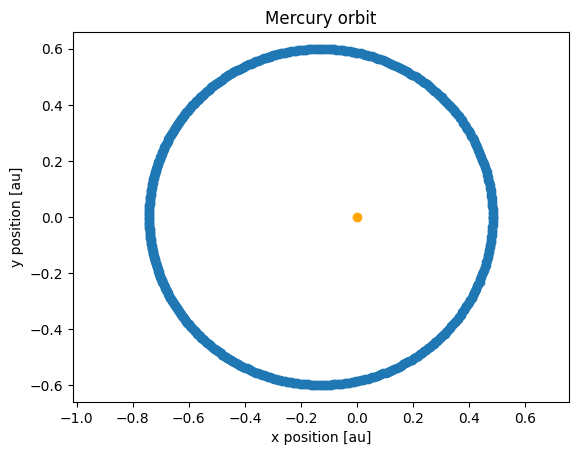

In [13]:
# Define Mercury's parameters; 
orbital_period_Mercury = 0.48
eccentricity_Mercury = 0.21

# compute Mercury's true anomaly
true_anomaly_Mercury = make_kepler_orbit(eccentricity_Mercury,orbital_period_Mercury)
                                         
# compute Mercury's separation
semimajor_axis_Mercury = keplerIII_period_to_semimajor_axis(orbital_period_Mercury)

# compute Mercury's x and y orbital coordinates
xOrbit_Mercury, yOrbit_Mercury = orbit(semimajor_axis_Mercury,eccentricity_Mercury,
                                       true_anomaly_Mercury)

plt.title('Mercury orbit')
# The Sun is located at the origin.
plt.scatter(0,0, color='orange')
plt.scatter(xOrbit_Mercury,yOrbit_Mercury)
plt.axis('equal')
plt.xlabel('x position [au]')
plt.ylabel('y position [au]')
plt.show()
